# Adaboost Model

In [1]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import scikitplot as skplt
import multiprocessing
from sklearn.ensemble import AdaBoostClassifier
from scikitplot.plotters import plot_feature_importances
import graphviz
from sklearn.tree import export_graphviz

In [4]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [5]:
def evaluate_model (model, y_pred, y_probs, visualize = True, tuned = False):
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy Score: ', accuracy)

    print(classification_report(y_test, y_pred))

    skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    skplt.metrics.plot_roc(y_test, y_probs)
    skplt.metrics.plot_precision_recall_curve(y_test, y_probs)

    if not tuned:
        plot_feature_importances(model, feature_names = X_test.columns)

## 1. Load Data from GitHub

In [6]:
X_train = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/HW2/X_train.csv?raw=true')
X_test = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/HW2/X_test.csv?raw=true')
y_train = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/HW2/y_train.csv?raw=true')
y_test = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/HW2/y_test.csv?raw=true')

In [7]:
X_test.shape, X_train.shape

((61, 17), (242, 17))

In [8]:
y_test.shape, y_train.shape

((61, 1), (242, 1))

## 2. Base Ada Model

In [9]:
af = AdaBoostClassifier(random_state = 42)
af.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=42)

In [10]:
y_pred = af.predict(X_test)
y_probs = af.predict_proba(X_test)

Accuracy Score:  0.8032786885245902
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_feature_importances is deprecated; This will be removed in v0.4.0. Please use scikitplot.estimators.plot_feature_importances instead.
  warnings.warn(msg, category=FutureWarning)


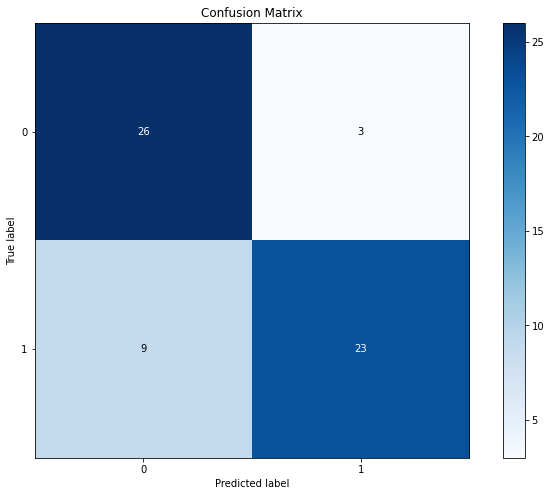

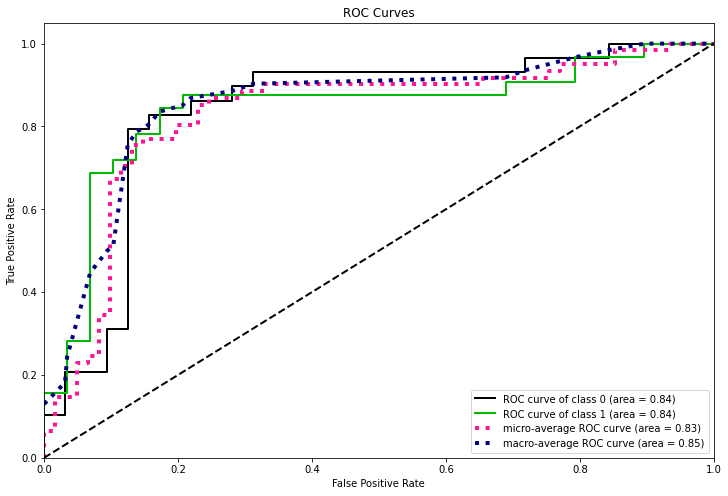

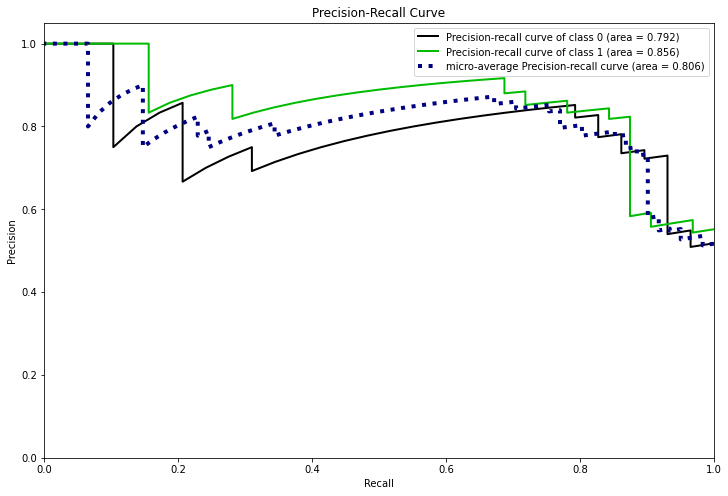

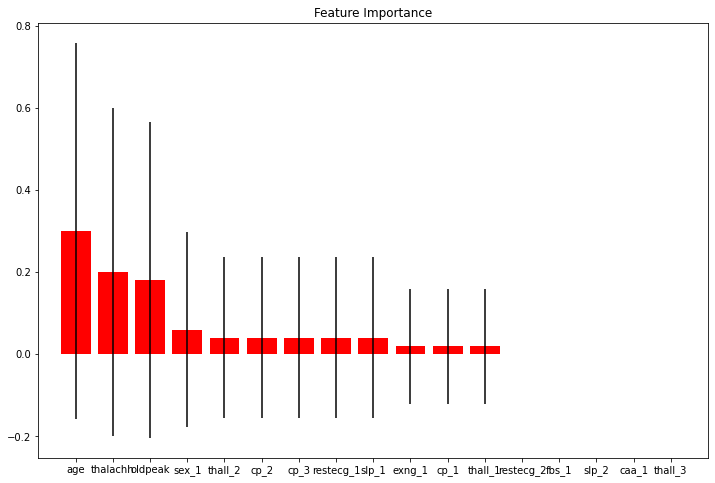

In [11]:
evaluate_model(af, y_pred, y_probs)

## 3. Hyperparameter Tuning With ```GridSearchCV```



In [12]:
af = AdaBoostClassifier(random_state = 42)

In [16]:
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [17]:
clf = GridSearchCV(af, param_grid, n_jobs = 2, verbose = 10)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
0.8011904761904762
{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)

Accuracy Score:  0.7868852459016393
              precision    recall  f1-score   support

           0       0.71      0.93      0.81        29
           1       0.91      0.66      0.76        32

    accuracy                           0.79        61
   macro avg       0.81      0.79      0.78        61
weighted avg       0.82      0.79      0.78        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


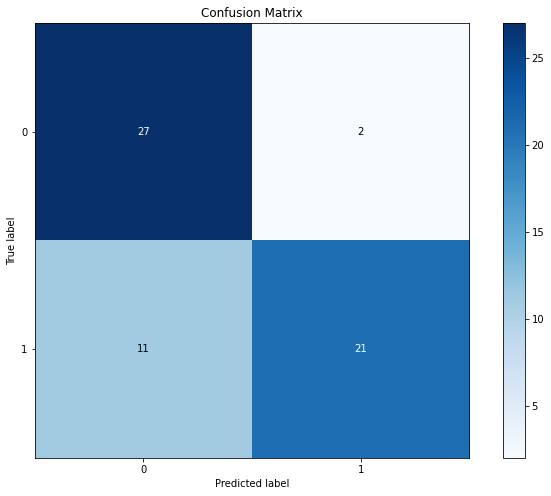

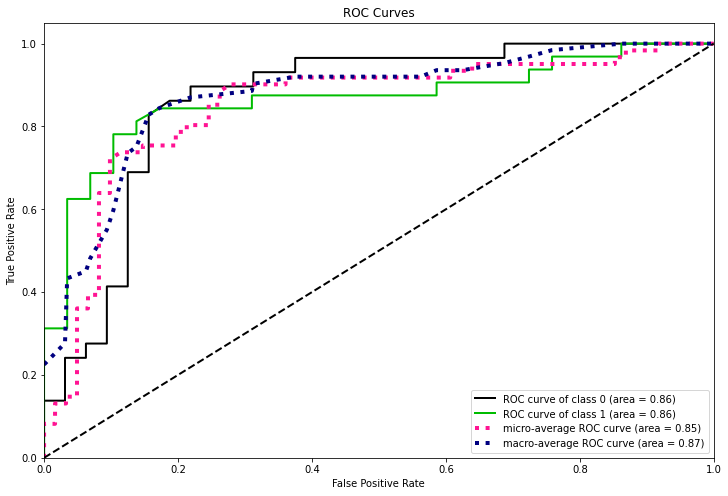

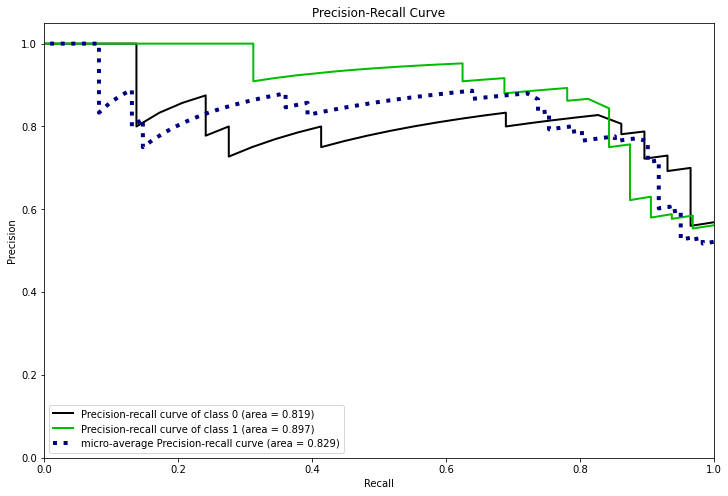

In [19]:
evaluate_model(clf, y_pred, y_probs, visualize = False, tuned = True)